자기상관함수(ACF)는 시계열 데이터의 내재된 패턴을 분석하고 적절한 모델을 선택하는 데 핵심적인 도구입니다. 

    이를 통해 데이터의 메모리 효과, 주기성, 모델링 적합성을 평가할 수 있습니다.

### AR(1)

<Figure size 1000x600 with 0 Axes>

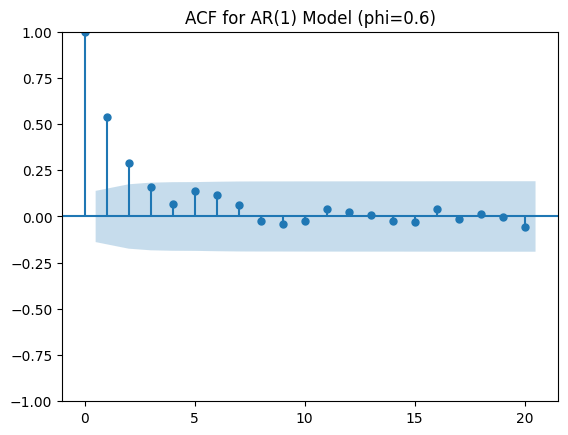

In [10]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# 1. AR(1) 모형 데이터 생성
np.random.seed(42)  # 재현성을 위해 시드 설정
ar = np.array([1, -0.6])  # AR(1): phi = 0.6
ma = np.array([1])        # MA(0): AR 모델
AR1_process = ArmaProcess(ar, ma)  # ARMA(1,0) 정의
simulated_data = AR1_process.generate_sample(nsample=200)  # 데이터 생성

# 2. ACF 계산 및 시각화
plt.figure(figsize=(10, 6))
plot_acf(simulated_data, lags=20, title="ACF for AR(1) Model (phi=0.6)")
plt.show()


### AR(2)

<Figure size 1000x600 with 0 Axes>

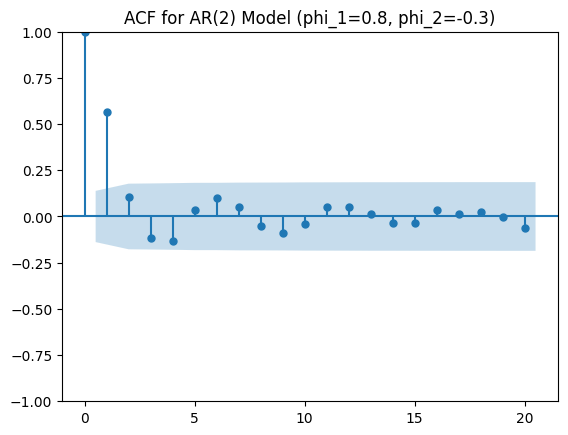

In [6]:
# AR(2) 모형 데이터 생성 및 ACF 시각화

# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# 1. AR(2) 모형 데이터 생성
np.random.seed(42)  # 재현성을 위해 시드 설정
ar = np.array([1, -0.8, 0.3])  # AR(2): phi_1 = 0.8, phi_2 = -0.3
ma = np.array([1])             # MA(0): AR 모델
AR2_process = ArmaProcess(ar, ma)
simulated_data_ar2 = AR2_process.generate_sample(nsample=200)  # 데이터 생성

# 2. ACF 계산 및 시각화
plt.figure(figsize=(10, 6))
plot_acf(simulated_data_ar2, lags=20, title="ACF for AR(2) Model (phi_1=0.8, phi_2=-0.3)")
plt.show()


Ljung-Box 테스트와 Shapiro-Wilk 테스트

Ljung-Box 테스트와 Shapiro-Wilk 테스트를 통해 잔차를 검증하는 Python 코드입니다. 

추가적으로 잔차의 히스토그램과 함께 잔차 분포의 정규성을 확인합니다.

코드 설명
시계열 데이터 생성:

예제 데이터를 생성하고, ARIMA 모델을 적합합니다.
잔차 계산:

ARIMA 모델의 잔차를 results.resid를 사용하여 계산합니다.
Ljung-Box 테스트:

잔차가 백색잡음인지 검증.
Shapiro-Wilk 테스트:

잔차가 정규분포를 따르는지 검증.
잔차의 ACF:

잔차의 자기상관을 확인합니다.
잔차 히스토그램 및 Q-Q 플롯:

잔차의 분포와 정규성을 시각적으로 확인합니다.

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  36.207458   0.000078

Shapiro-Wilk Test Results:
Test Statistic: 0.9913, P-value: 0.2703


<Figure size 1000x600 with 0 Axes>

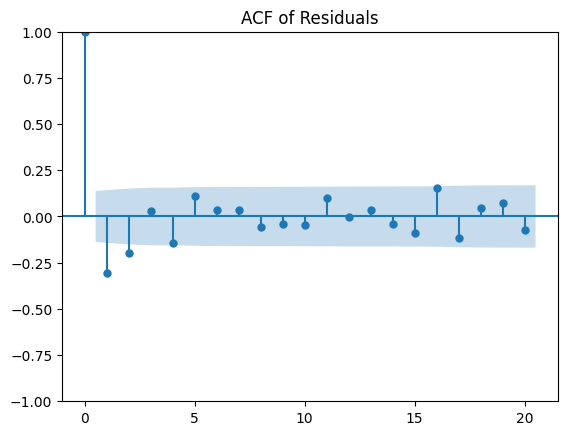

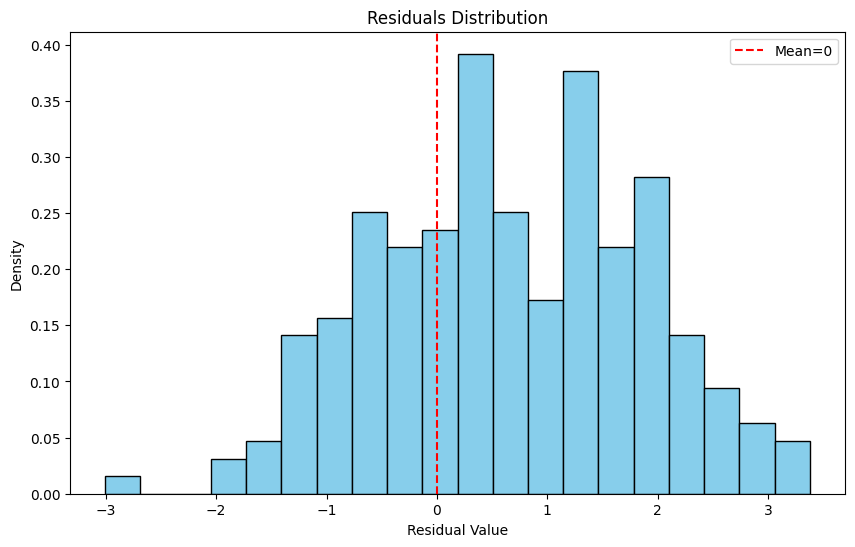

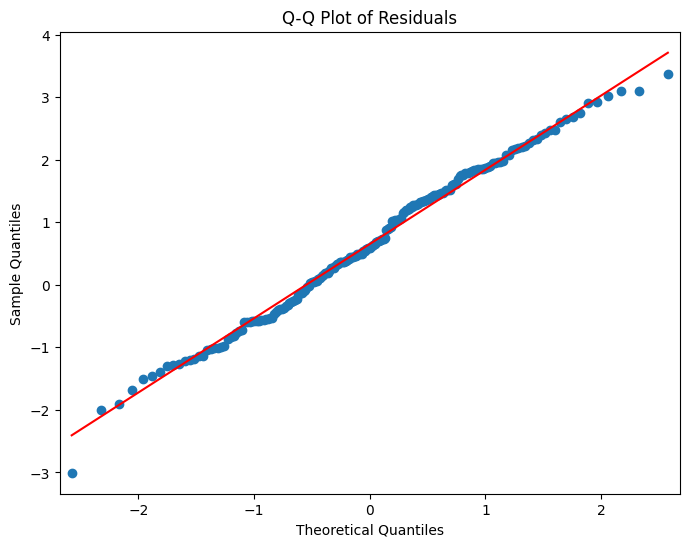

In [3]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# 1. 예제 시계열 데이터 생성 (랜덤 데이터 + 트렌드)
np.random.seed(42)
n = 200
data = 0.5 * np.arange(n) + np.random.normal(0, 1, n)

# pandas 데이터프레임으로 변환
df = pd.DataFrame(data, columns=["value"])

# 2. ARIMA(1,1,0) 모델 적합 (간단한 모델)
model = ARIMA(df["value"], order=(1, 1, 0))
results = model.fit()

# 3. 잔차 계산
residuals = results.resid

# 4. Ljung-Box 테스트
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

# 5. Shapiro-Wilk 테스트
shapiro_test_stat, shapiro_p_value = shapiro(residuals)

# 결과 출력
print("Ljung-Box Test Results:")
print(lb_test)

print("\nShapiro-Wilk Test Results:")
print(f"Test Statistic: {shapiro_test_stat:.4f}, P-value: {shapiro_p_value:.4f}")

# 6. 잔차 ACF 플롯
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20, title="ACF of Residuals")
plt.show()

# 7. 잔차 분포 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, density=True, color="skyblue", edgecolor="black")
plt.title("Residuals Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.axvline(x=0, color="red", linestyle="--", label="Mean=0")
plt.legend()
plt.show()

# 8. Q-Q Plot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")
plt.show()


결과 해석
Ljung-Box 테스트 결과:

p-값: 0.000078

p-값이 매우 작으므로, 잔차가 백색잡음(white noise)이 아닐 가능성을 시사.
이는 모델이 데이터의 전체 패턴을 완전히 설명하지 못했을 수 있음을 의미.
하지만 이 결과는 데이터와 모형의 특성에 따라 달라질 수 있으므로 다른 지표와 함께 분석해야 합니다.
Shapiro-Wilk 테스트 결과:

Test Statistic: 0.991
p-값: 0.27
p-값이 0.05보다 크므로, 잔차가 정규분포를 따른다는 귀무가설을 기각할 수 없음.
이는 잔차가 정규성을 만족한다고 해석할 수 있음.
잔차 분포 히스토그램:

잔차가 평균 0을 중심으로 대칭적으로 분포하고 있음.
이는 잔차가 정규성을 가지고 있음을 시각적으로 확인할 수 있음.

### PACF 시각화

<Figure size 1000x600 with 0 Axes>

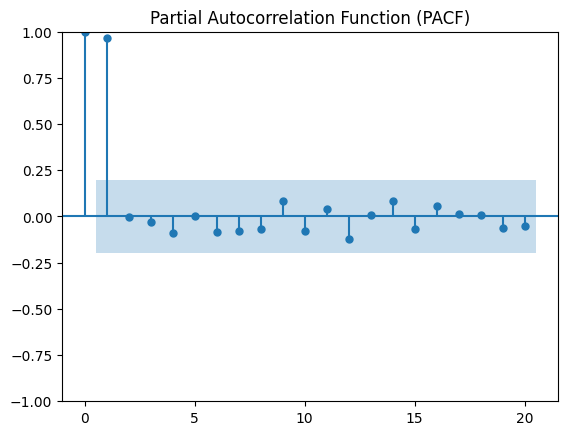

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# 1. 예제 시계열 데이터 생성
np.random.seed(42)
n = 100
data = np.random.randn(n).cumsum()  # 누적합 데이터 생성

# 2. PACF 계산 및 시각화
plt.figure(figsize=(10, 6))
plot_pacf(data, lags=20, method='ywm', title="Partial Autocorrelation Function (PACF)")
plt.show()


PACF 해석
시차 1~2에서 높은 PACF 값:

시계열 데이터가 시차 1~2의 자기회귀 효과를 강하게 반영.
시차 3 이후 갑작스러운 감소:

PACF가 시차 3 이후 0에 가까워지면, AR 차수 
𝑝
=
2
p=2를 선택.
ARIMA 모델 활용:

PACF를 기반으로 자기회귀(AR) 차수를 결정하고, ACF를 기반으로 MA 차수를 결정하여 모델링.

### S&P 500

[*********************100%***********************]  1 of 1 completed


<Figure size 1000x600 with 0 Axes>

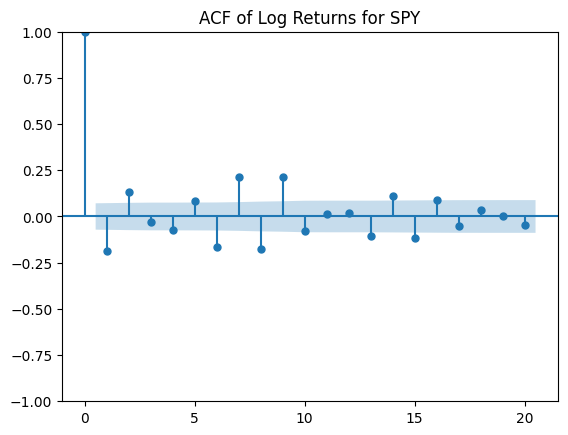

In [11]:
# 금융 데이터로 AR(2) 모델 생성 및 ACF 시각화

# 필요한 라이브러리 불러오기
import yfinance as yf
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# 1. 금융 데이터 다운로드 (S&P 500 데이터 예시)
symbol = "SPY"  # S&P 500 ETF
data = yf.download(symbol, start="2020-01-01", end="2023-01-01")
close_prices = data["Close"]

# 2. 수익률 계산 (로그 수익률)
log_returns = close_prices.pct_change().dropna()  # 비율 수익률 계산 후 결측값 제거

# 3. ACF 시각화
plt.figure(figsize=(10, 6))
plot_acf(log_returns, lags=20, title="ACF of Log Returns for SPY")
plt.show()
